<a href="https://colab.research.google.com/github/1kaiser/Snow-cover-area-estimation/blob/main/OpenAltimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenAltimetry ICESat-2: Elevation Workflow
Overview


This notebook pulls data from ICESat-2 surface-specific products - ATL06, ATL07, ATL08, ATL10, ATL12, ATL13 via the OpenAltimetry API.


Instructions
Replace the "OA_API_URL" string with the data copied from : "Copy API URL" from the OpenAltimetry elevation chart and start visualizing your data!
Author: Minh Phan - mnphan@ucsd.edu. Based off the work of Luis Lopez - luis.lopez@nsidc.org

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


https://openaltimetry.org/data/api/icesat2/atl06?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=447&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json&client=jupyter


In [ ]:
data

{'product': 'ATL06',
 'scForward': True,
 'trackId': 447,
 'series': [{'beam': 'gt3r',
   'isStrongBeam': True,
   'lat_lon_elev': [[32.41654703415639, 77.34211547864146, 5180.824],
    [32.416366097818205, 77.34210633966643, 5124.139],
    [32.41618547908113, 77.34209337539642, 5086.2085],
    [32.41600561302678, 77.342071334818, 5090.022],
    [32.415825657540466, 77.3420503685615, 5090.3003],
    [32.41564565191409, 77.34203001178935, 5089.8193],
    [32.41546574195223, 77.34200849739938, 5097.7847],
    [32.41528551975446, 77.34199076208921, 5088.779],
    [32.41510489258915, 77.34197788636538, 5058.964],
    [32.41492440639438, 77.34196332892714, 5036.4614],
    [32.41474421384178, 77.34194522478685, 5029.9673],
    [32.41456416157509, 77.34192542654966, 5030.142],
    [32.41438421294989, 77.34190438159294, 5035.1753],
    [32.41420432723775, 77.34188257550113, 5041.6807],
    [32.414024444373716, 77.34186073569396, 5046.7427],
    [32.413844559438004, 77.34183890571256, 5050.472]

[dates and track id google sheet](https://docs.google.com/spreadsheets/d/13sjRCD2E2oyjkJwXOxeu5P3V6Ql9nW0KZe1gnsPFNOM/edit?usp=sharing)

In [1]:
a = [["2021-11-04",653],
["2021-11-08",714],
["2021-11-19",889],
["2021-11-23",950],
["2021-11-27",1011],
["2021-11-29",1034],
["2021-12-03",1095],
["2021-12-07",1156],
["2021-12-18",1331],
["2021-12-22",5],
["2021-12-26",66],
["2021-12-28",89],]

In [28]:
len(a)

12

In [2]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  



filepath = Path('2021PW.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

OA_BEAMS = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']

df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

for elevation_data in b:
  product = elevation_data["product"]

  print('Reading data product: ' + product)

  for series_beam in elevation_data['series']:
      if any(word in series_beam['beam'] for word in OA_BEAMS):
          series = []
          
          data_name = 'lat_lon_elev'
          if product == 'ATL08':
              data_name = 'lat_lon_elev_canopy'

          for p in series_beam[data_name]:
              series.append({
                  'lat': p[0],
                  'lon': p[1],
                  'h': p[2]
              })
              
          print ('beam ' + series_beam['beam'] + ' - len = ' + str(len(series)))

          if (len(series) > 0):
              df = pd.DataFrame.from_dict(series)
              df.name = series_beam['beam']
              df_beams.append(df)


 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

for df in df_beams:
    oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
                                    marker=dict(
                                        size=2,
                                        color=df['h'],
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ),
                                    line=dict(
                                        color='darkblue',
                                        width=2
                                    )
                                )
                   )

layout = go.Layout(
    width=1200,
    height=600,
    scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
                 xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
)

print('Plotting...')

fig = go.Figure(data=oa_plots, layout=layout)

iplot(fig)


Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl06?date=2021-11-04&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=653&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json&client=jupyter
Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl06?date=2021-11-08&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=714&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json&client=jupyter
Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl06?date=2021-11-19&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=889&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json&client=jupyter
Requesting data from OA >>>  https://openaltimetry.org/data/api/icesat2/atl06?date=2021-11-23&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.4166

In [26]:
pd.concat(df_beams)


lat        lon          h
0     32.416665  77.210551  3666.8930
1     32.416485  77.210531  3677.7886
2     32.416305  77.210511  3688.7615
3     32.416124  77.210492  3699.7886
4     32.415944  77.210473  3704.7405
...         ...        ...        ...
1492  32.415843  76.447273  2689.5144
1493  32.416023  76.447253  2655.8416
1494  32.416203  76.447233  2630.6006
1495  32.416383  76.447212  2618.7053
1496  32.416563  76.447192  2612.2402

[1842992 rows x 3 columns]

https://openaltimetry.org

In [ ]:
a = !curl -X GET "https://openaltimetry.org/data/api/icesat2/atl06?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=447&client=portal&outputFormat=json" -H "accept: */*"

In [ ]:
a

['{"product": "ATL06", "scForward": true, "trackId": 447, "series": [{"beam": "gt1l","isStrongBeam": false,"lat_lon_elev": [[32.415826947054,77.40977539732262,5759.157],[32.41564708677463,77.40975318307426,5779.3994],[32.41546696842656,77.40973402327279,5790.8433],[32.41528629887673,77.40972147550099,5785.549],[32.415105393849394,77.40971175233625,5772.1113],[32.41492495041405,77.40969648237069,5773.182],[32.41474467385934,77.40967925787311,5780.378],[32.41456423579399,77.40966391104683,5781.9365],[32.41438357378778,77.4096512605006,5775.57],[32.414202737380144,77.40964071701455,5764.6562],[32.414021949992026,77.40962957197803,5755.673],[32.413841277340985,77.40961705478861,5748.877],[32.41366069445406,77.40960347947998,5745.9023],[32.41348014584254,77.4095895156828,5743.6367],[32.41329949781497,77.40957661645751,5739.281],[32.413118978922355,77.40956228691743,5738.135],[32.412938519833546,77.40954722162655,5739.3096],[32.41275794879942,77.40953351183657,5736.871],[32.41257727149889,77

In [ ]:
!wget https://openaltimetry.org/data/api/icesat2/getTracks?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&outputFormat=json -O a.json


/bin/bash: -O: command not found
--2023-01-30 22:10:46--  https://openaltimetry.org/data/api/icesat2/getTracks?date=2019-10-26
Resolving openaltimetry.org (openaltimetry.org)... 169.228.63.181
Connecting to openaltimetry.org (openaltimetry.org)|169.228.63.181|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 212 [application/json]
Saving to: ‘getTracks?date=2019-10-26.1’

getTracks?date=2019 100%[===================>]     212  --.-KB/s    in 0s      

2023-01-30 22:10:46 (27.5 MB/s) - ‘getTracks?date=2019-10-26.1’ saved [212/212]



**VISUALIZATION**

ValueError: ignored

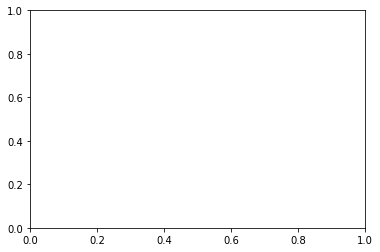

In [4]:
import matplotlib.pyplot as plt
import numpy as np

data1 = a

colors1 = ['C{}'.format(i) for i in range(6)]

lineoffsets1 = [-15, -3, 1, -10, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

plt.eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)
plt.title('Event Plot')
plt.xlabel('Time(s)')
plt.ylabel('Signal')